# Introduction

This notebook contains the following:

1. Some example games to show various strategies against each other
2. Code for running the strategy tournament and analyzing its results

In [ ]:
import sys
import os

proj_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if proj_root not in sys.path:
    sys.path.insert(0, proj_root)

In [2]:
from core import (Game, Player, run_tournament)
from strategies.proposers import (ConcedingProposer, RandomProposer, TitForTatProposer, LearningProposer, BinarySearchProposer, RiskAwareProposer, ForwardLookingProposer)
from strategies.responders import (UtilitarianResponder, TitForTatResponder, ProbabilisticResponder, StrategicRejectorResponder)

## Part 1: Strategy One-Offs

### Conceding Proposer vs Utilitarian Responder

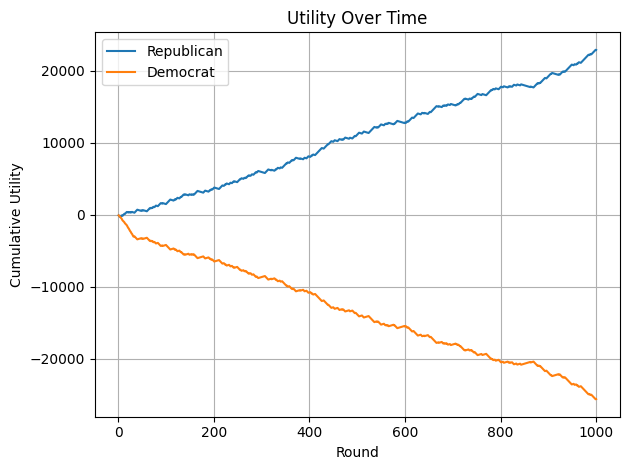

In [43]:
player1 = Player("Republican",
    proposer_strategy=ConcedingProposer(start_offer=90, decrement=5),
    responder_strategy=UtilitarianResponder()
)

player2 = Player("Democrat",
    proposer_strategy=ConcedingProposer(start_offer=90, decrement=5),
    responder_strategy=UtilitarianResponder()
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(1000)

### Random Normal Proposer vs Utilitarian Responder

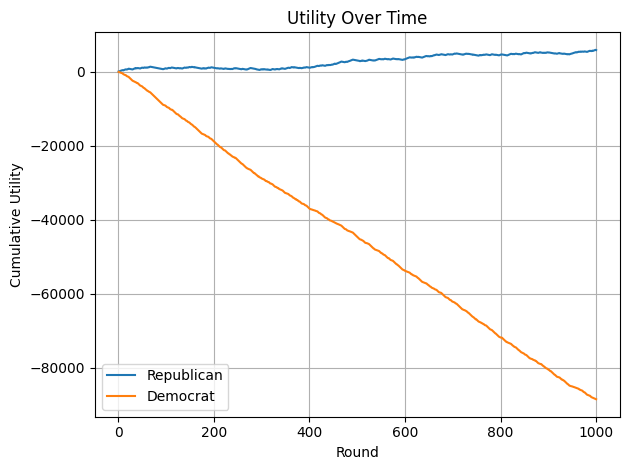

In [44]:
player1 = Player("Republican",
    proposer_strategy=RandomProposer(distribution="normal", mean=50, stddev=15),
    responder_strategy=UtilitarianResponder()
)

player2 = Player("Democrat",
    proposer_strategy=RandomProposer(distribution="normal", mean=50, stddev=15),
    responder_strategy=UtilitarianResponder()
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(1000)


### Conceding Proposer vs Tit for Tat Responder

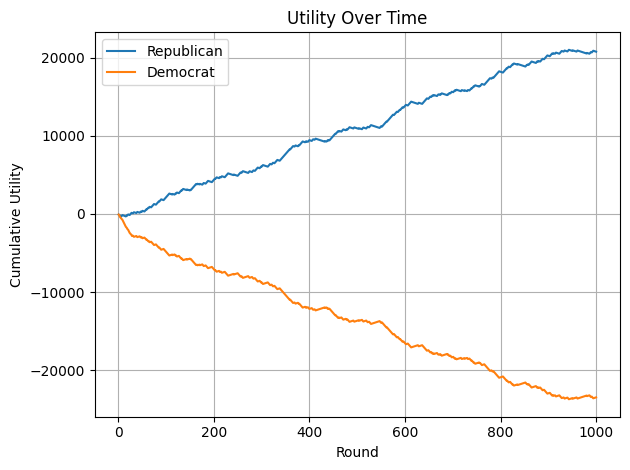

In [45]:
player1 = Player("Republican",
    proposer_strategy=ConcedingProposer(start_offer=90, decrement=5),
    responder_strategy=TitForTatResponder()
)

player2 = Player("Democrat",
    proposer_strategy=ConcedingProposer(start_offer=90, decrement=5),
    responder_strategy=TitForTatResponder()
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(1000)


### Tit-for-Tat Proposer + Conceding Proposer vs Utilitarian Responder

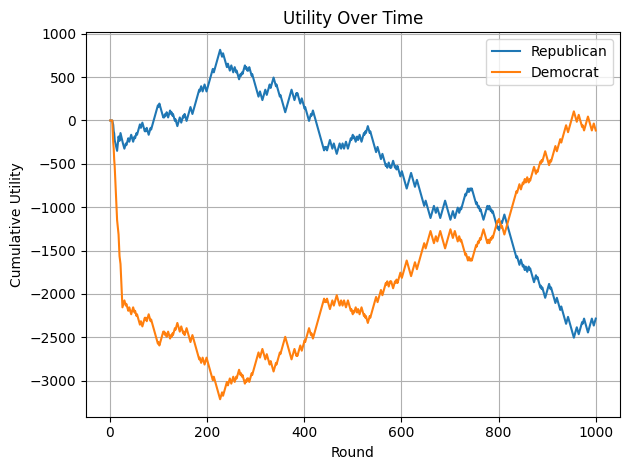

In [46]:
player1 = Player("Republican",
    proposer_strategy=TitForTatProposer(),
    responder_strategy=UtilitarianResponder()
)

player2 = Player("Democrat",
    proposer_strategy=ConcedingProposer(start_offer=90, decrement=5),
    responder_strategy=UtilitarianResponder()
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(1000)


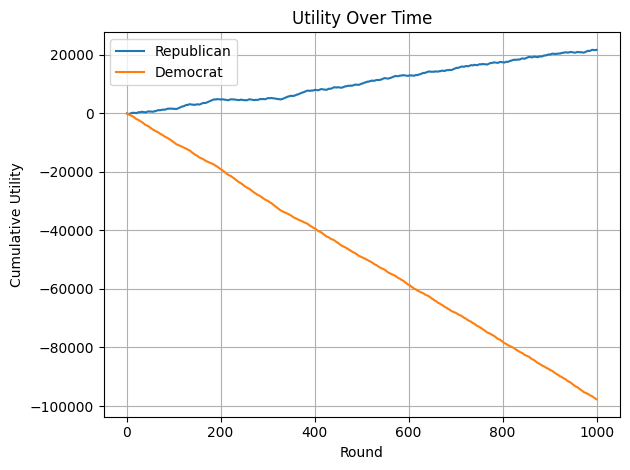

In [47]:
player1 = Player("Republican",
    proposer_strategy=ConcedingProposer(start_offer=90, decrement=5),
    responder_strategy=UtilitarianResponder()
)

player2 = Player("Democrat",
    proposer_strategy=TitForTatProposer(),
    responder_strategy=UtilitarianResponder()
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(1000)

### Conceding Proposer vs Probabilistic Responder

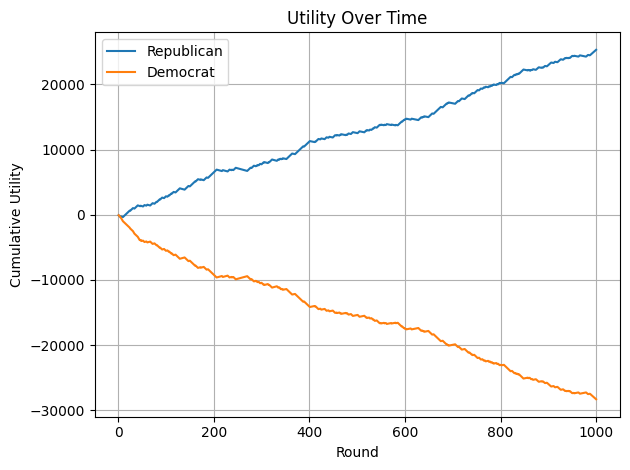

In [48]:
player1 = Player("Republican",
    proposer_strategy=ConcedingProposer(start_offer=90, decrement=5),
    responder_strategy=ProbabilisticResponder(alpha=1.0)
)

player2 = Player("Democrat",
    proposer_strategy=ConcedingProposer(start_offer=90, decrement=5),
    responder_strategy=ProbabilisticResponder(alpha=1.0)
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(1000)


### Naive Learning Proposer vs Utilitarian Responder

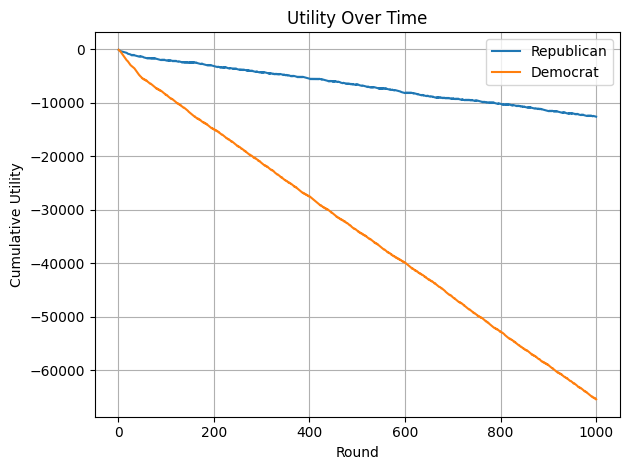

In [49]:
player1 = Player("Republican",
    proposer_strategy=LearningProposer(start_offer=90, step_size=2),
    responder_strategy=UtilitarianResponder()
)

player2 = Player("Democrat",
    proposer_strategy=LearningProposer(start_offer=90, step_size=2),
    responder_strategy=UtilitarianResponder()
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

# Run and observe convergence
game.run(1000)


### Naive Learning vs Probabilistic Responder

Republican offered 90.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Republican offered 88.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Republican offered 86.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Roles switched. Now Democrat is proposer.
Democrat offered 90.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Roles switched. Now Republican is proposer.
Republican offered 84.00. Democrat accepted.
Republican offered 86.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Republican offered 84.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Roles switched. Now Democrat is proposer.
Democrat offered 88.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Roles switched. Now Republican is proposer.
Republican offered 82.00. Democrat rejected.
Bad outcome: Republica

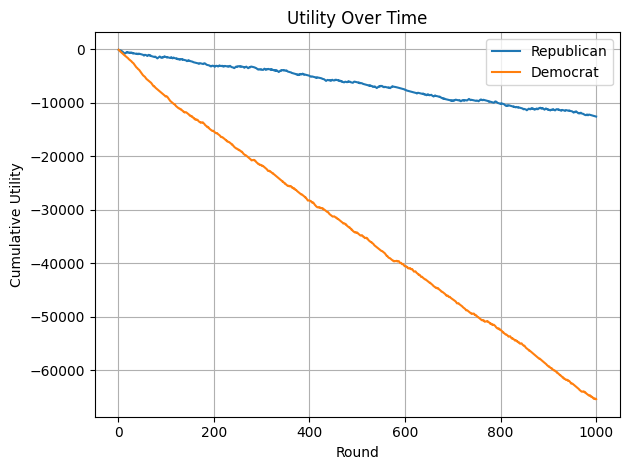

In [50]:
player1 = Player("Republican",
    proposer_strategy=LearningProposer(start_offer=90, step_size=2),
    responder_strategy=ProbabilisticResponder(alpha=0.1)
)

player2 = Player("Democrat",
    proposer_strategy=LearningProposer(start_offer=90, step_size=2),
    responder_strategy=ProbabilisticResponder(alpha=0.1)
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=True,
    plot=True
)

game.run(1000)


### Binary Search Proposer vs Utilitarian Responder

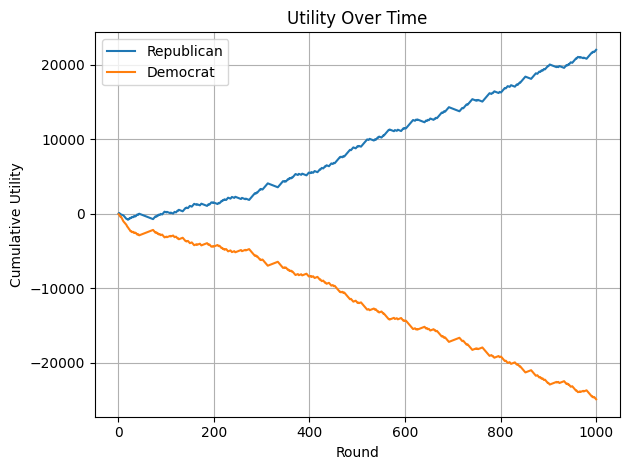

In [51]:
player1 = Player("Republican",
    proposer_strategy=BinarySearchProposer(min_offer=0, max_offer=100),
    responder_strategy=UtilitarianResponder()
)

player2 = Player("Democrat",
    proposer_strategy=BinarySearchProposer(min_offer=0, max_offer=100),
    responder_strategy=UtilitarianResponder()
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(1000)


### Binary Search Proposer vs Probabilistic Responder

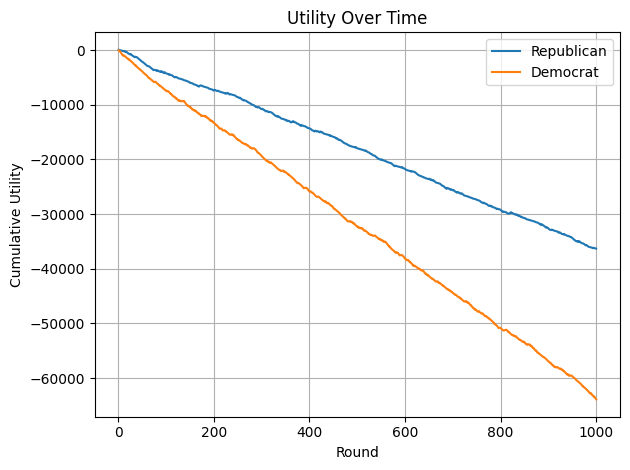

In [52]:
player1 = Player("Republican",
    proposer_strategy=BinarySearchProposer(min_offer=0, max_offer=100),
    responder_strategy=ProbabilisticResponder(alpha=1.0)
)

player2 = Player("Democrat",
    proposer_strategy=BinarySearchProposer(min_offer=0, max_offer=100),
    responder_strategy=ProbabilisticResponder(alpha=1.0)
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=False,
    plot=True
)

game.run(1000)


### Risk Aware Proposer vs Probabilistic Responder

Republican offered 100.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Republican offered 90.00. Democrat accepted.
Roles switched. Now Democrat is proposer.
Democrat offered 100.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Democrat offered 90.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Roles switched. Now Republican is proposer.
Republican offered 90.00. Democrat accepted.
Roles switched. Now Democrat is proposer.
Democrat offered 80.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Roles switched. Now Republican is proposer.
Republican offered 90.00. Democrat accepted.
Republican offered 90.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Republican offered 90.00. Democrat accepted.
Republican offered 90.00. Democrat accepted.
Republican offered 90.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democra

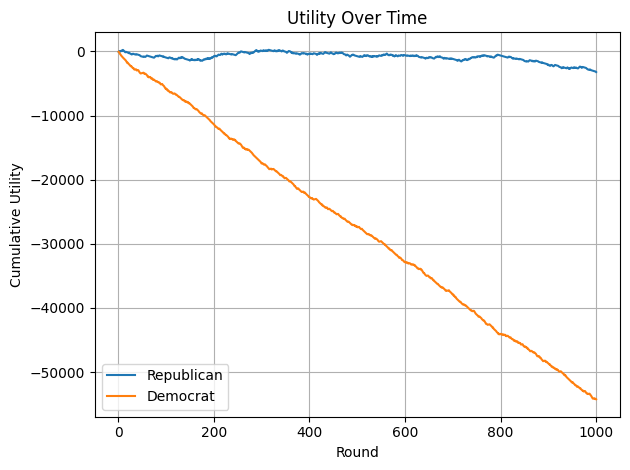

In [69]:
player1 = Player("Republican",
    proposer_strategy=RiskAwareProposer(),
    responder_strategy=ProbabilisticResponder(alpha=0.1)
)

player2 = Player("Democrat",
    proposer_strategy=RiskAwareProposer(),
    responder_strategy=ProbabilisticResponder(alpha=0.1)
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.3,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=True,
    plot=True  # Optional
)

game.run(1000)


### Risk Aware Proposer vs Probabilistic Respodner

Republican offered 100.00. Democrat rejected.
Bad outcome: Republican gets -97.79698215106487, Democrat gets -75.0.
Republican offered 90.00. Democrat rejected.
Bad outcome: Republican gets -90.0050526663643, Democrat gets -75.0.
Republican offered 80.00. Democrat rejected.
Bad outcome: Republican gets -79.61012304666505, Democrat gets -75.0.
Republican offered 70.00. Democrat accepted.
Republican offered 70.00. Democrat accepted.
Roles switched. Now Democrat is proposer.
Democrat offered 100.00. Republican rejected.
Bad outcome: Democrat gets -143.8179490620327, Republican gets -25.0.
Democrat offered 90.00. Republican rejected.
Bad outcome: Democrat gets -133.5580192814844, Republican gets -25.0.
Democrat offered 80.00. Republican rejected.
Bad outcome: Democrat gets -135.72184244717445, Republican gets -25.0.
Democrat offered 70.00. Republican rejected.
Bad outcome: Democrat gets -137.61680627777065, Republican gets -25.0.
Democrat offered 60.00. Republican rejected.
Bad outcome: De

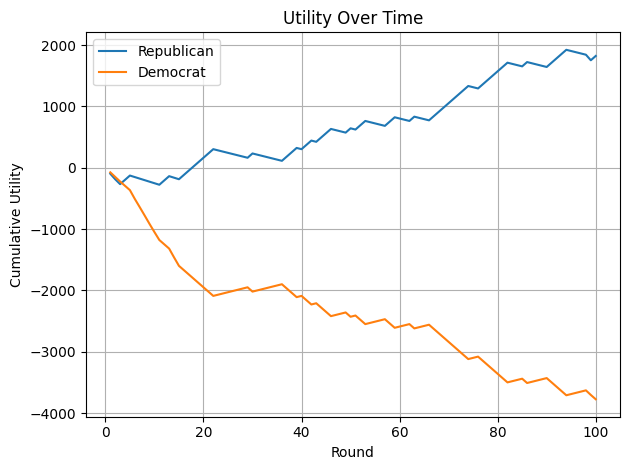

In [70]:
player1 = Player("Republican",
    proposer_strategy=RiskAwareProposer(),
    responder_strategy=ProbabilisticResponder(alpha=1)
)

player2 = Player("Democrat",
    proposer_strategy=RiskAwareProposer(),
    responder_strategy=ProbabilisticResponder(alpha=1)
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.3,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    proposer_random_penalty_range=(-25, 0),
    receiver_random_penalty_range=(0, 0),
    min_offer=0,
    max_offer=100,
    verbose=True,
    plot=True
)

game.run(100)


### Risk Aware Proposer vs Strategic Rejector Responder

Republican offered 100.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Republican offered 90.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Republican offered 80.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Republican offered 70.00. Democrat accepted.
Republican offered 70.00. Democrat accepted.
Roles switched. Now Democrat is proposer.
Democrat offered 100.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Democrat offered 90.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Democrat offered 80.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Democrat offered 70.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Democrat offered 60.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Democrat offered 50.00. Republican rejected.


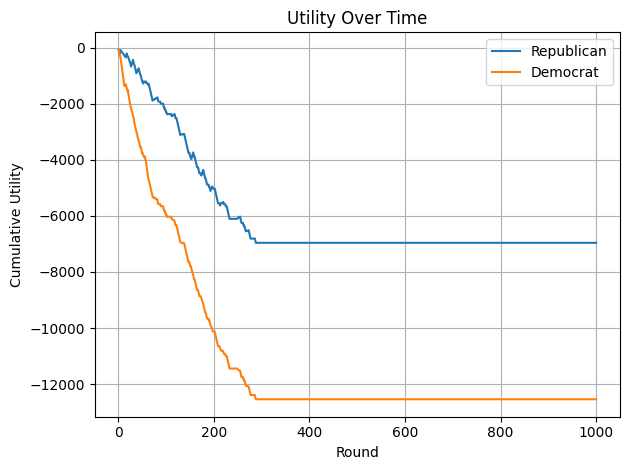

In [71]:
player1 = Player("Republican",
    proposer_strategy=RiskAwareProposer(),
    responder_strategy=StrategicRejectorResponder(stagnation_tolerance=4)
)

player2 = Player("Democrat",
    proposer_strategy=RiskAwareProposer(),
    responder_strategy=StrategicRejectorResponder(stagnation_tolerance=4)
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.3,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    min_offer=0,
    max_offer=100,
    verbose=True,
    plot=True
)

game.run(1000)


### Forward Looking Proposer vs Strategic Rejector Responder

Republican offered 100.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Roles switched. Now Democrat is proposer.
Democrat offered 100.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Roles switched. Now Republican is proposer.
Republican offered 90.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Roles switched. Now Democrat is proposer.
Democrat offered 90.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Roles switched. Now Republican is proposer.
Republican offered 80.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Republican offered 70.00. Democrat accepted.
Roles switched. Now Democrat is proposer.
Democrat offered 80.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Democrat offered 70.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Roles switched. Now R

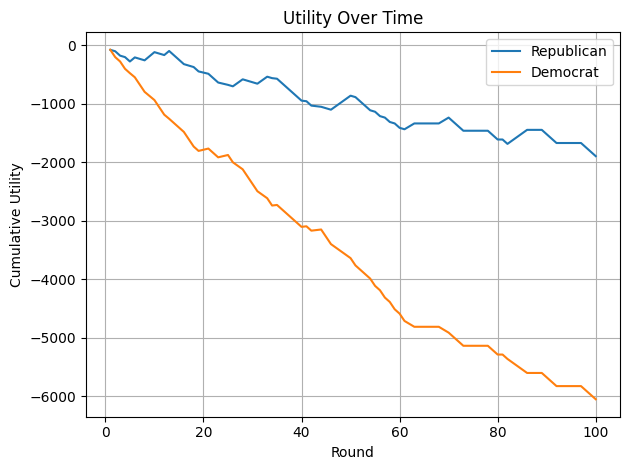

In [72]:
player1 = Player("Republican",
    proposer_strategy=ForwardLookingProposer(horizon=5, prior_accept_prob=0.5, responder_utility_estimate=-75),
    responder_strategy=StrategicRejectorResponder(stagnation_tolerance=4)
)

player2 = Player("Democrat",
    proposer_strategy=ForwardLookingProposer(horizon=5, prior_accept_prob=0.5, responder_utility_estimate=-100),
    responder_strategy=StrategicRejectorResponder(stagnation_tolerance=4)
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    p_reject_bump=0.1,
    min_offer=0,
    max_offer=100,
    verbose=True,
    plot=True
)

game.run(100)


### Forward Looking Proposer vs Probabilistic Responder

Republican offered 100.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Republican offered 90.00. Democrat accepted.
Republican offered 90.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Roles switched. Now Democrat is proposer.
Democrat offered 100.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Roles switched. Now Republican is proposer.
Republican offered 90.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Republican offered 80.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Roles switched. Now Democrat is proposer.
Democrat offered 90.00. Republican rejected.
Bad outcome: Democrat gets -125.0, Republican gets -25.0.
Roles switched. Now Republican is proposer.
Republican offered 70.00. Democrat accepted.
Republican offered 70.00. Democrat rejected.
Bad outcome: Republican gets -75.0, Democrat gets -75.0.
Republican offered 7

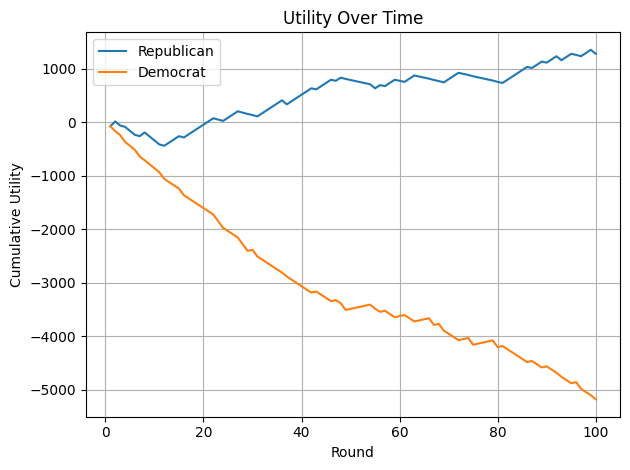

In [73]:
player1 = Player("Republican",
    proposer_strategy=ForwardLookingProposer(
        horizon=5,
        prior_accept_prob=0.5,
        responder_utility_estimate=-75
    ),
    responder_strategy=ProbabilisticResponder(alpha=0.2)
)

player2 = Player("Democrat",
    proposer_strategy=ForwardLookingProposer(
        horizon=5,
        prior_accept_prob=0.5,
        responder_utility_estimate=-100
    ),
    responder_strategy=ProbabilisticResponder(alpha=0.2)
)

game = Game(
    player1=player1,
    player2=player2,
    p=0.25,
    player_1_bad=-50,
    player_2_bad=-100,
    proposer_bad=-25,
    receiver_bad=25,
    p_reject_bump=0.1,
    min_offer=0,
    max_offer=100,
    verbose=True,
    plot=True
)

game.run(100)


## Strategy Tournament

In [13]:
proposers = [
    ("BinarySearchProposer", lambda: BinarySearchProposer(min_offer=0, max_offer=100)),
    ("ConcedingProposer", lambda: ConcedingProposer(start_offer=90, decrement=5)),
    ("TitForTatProposer", lambda: TitForTatProposer()),
    ("RandomProposer", lambda: RandomProposer(distribution="normal", mean=50, stddev=15)),
    ("LearningProposer", lambda: LearningProposer(start_offer=90,step_size=2)),
    ("RiskAwareProposer", lambda: RiskAwareProposer()),
    ("ForwardLookingProposer", lambda: ForwardLookingProposer()),
]

responders = [
    ("UtilitarianResponder", lambda: UtilitarianResponder()),
    ("TitForTatResponder", lambda: TitForTatResponder()),
    ("HighVarProbabilisticResponder", lambda: ProbabilisticResponder(alpha=0.1)),
    ("NormalVarProbabilisticResponder", lambda: ProbabilisticResponder(alpha=1)),
    ("StrategicRejectorResponder", lambda: StrategicRejectorResponder())
]

df = run_tournament(proposers, responders, rounds_per_game=200, trials_per_match=50, game_kwargs={
    "player_1_bad": -50,
    "player_2_bad": -100,
    "proposer_bad": -25,
    "receiver_bad": 25,
    "min_offer": 0,
    "max_offer": 100,
})


In [53]:
summary = (
    df.groupby(["p1_proposer", "p1_responder", "p2_proposer", "p2_responder"])
    .agg(
        p1_avg_utility=("p1_utility", "mean"),
        p2_avg_utility=("p2_utility", "mean"),
        avg_rejections=("rejections", "mean"),
        n_trials=("trial", "count"),
    )
    .reset_index()
)


In [54]:
summary["utility_gap"] = summary["p1_avg_utility"] - summary["p2_avg_utility"]
summary["abs_gap"] = summary["utility_gap"].abs()

In [56]:
p1_best = summary.sort_values(by="p1_avg_utility",ascending=False)

In [57]:
p1_best[["p1_avg_utility", "avg_rejections", "utility_gap"]].describe()

,p1_avg_utility,avg_rejections,utility_gap
count,1225.000000,1225.000000,1225.000000
mean,448.500848,71.685812,11649.873533
std,3594.412785,44.843286,6542.281739
min,-8958.994966,0.000000,-2756.695446
25%,-2274.290288,27.000000,6315.600000
50%,607.406802,70.940000,11259.600000
75%,3922.995108,101.700000,16798.908166
max,6137.800000,192.000000,23756.807207


In [58]:
p1_best.head(50).reset_index()

,index,p1_proposer,p1_responder,p2_proposer,p2_responder,p1_avg_utility,p2_avg_utility,avg_rejections,n_trials,utility_gap,abs_gap
0,971,RiskAwareProposer,StrategicRejectorResponder,RiskAwareProposer,NormalVarProbabilisticResponder,6137.800000,-9569.800000,22.88,50,15707.600000,15707.600000
1,953,RiskAwareProposer,StrategicRejectorResponder,ConcedingProposer,TitForTatResponder,6124.400000,-9274.400000,21.00,50,15398.800000,15398.800000
2,974,RiskAwareProposer,StrategicRejectorResponder,RiskAwareProposer,UtilitarianResponder,6086.200000,-9386.200000,22.00,50,15472.400000,15472.400000
3,973,RiskAwareProposer,StrategicRejectorResponder,RiskAwareProposer,TitForTatResponder,6077.800000,-9377.800000,22.00,50,15455.600000,15455.600000
4,428,ForwardLookingProposer,StrategicRejectorResponder,ConcedingProposer,TitForTatResponder,6025.000000,-9175.000000,21.00,50,15200.000000,15200.000000
5,448,ForwardLookingProposer,StrategicRejectorResponder,RiskAwareProposer,TitForTatResponder,5998.000000,-9298.000000,22.00,50,15296.000000,15296.000000
6,274,ConcedingProposer,StrategicRejectorResponder,RiskAwareProposer,UtilitarianResponder,5995.800000,-9445.800000,23.00,50,15441.600000,15441.600000
7,273,ConcedingProposer,StrategicRejectorResponder,RiskAwareProposer,TitForTatResponder,5991.600000,-9441.600000,23.00,50,15433.200000,15433.200000
8,449,ForwardLookingProposer,StrategicRejectorResponder,RiskAwareProposer,UtilitarianResponder,5960.200000,-9260.200000,22.00,50,15220.400000,15220.400000
9,358,ForwardLookingProposer,HighVarProbabilisticResponder,ConcedingProposer,TitForTatResponder,5912.300000,-9758.300000,25.64,50,15670.600000,15670.600000


In [59]:
p1_best.tail(50).reset_index()

,index,p1_proposer,p1_responder,p2_proposer,p2_responder,p1_avg_utility,p2_avg_utility,avg_rejections,n_trials,utility_gap,abs_gap
0,77,BinarySearchProposer,StrategicRejectorResponder,ConcedingProposer,StrategicRejectorResponder,-7162.114966,-9511.885034,111.16,50,2349.770068,2349.770068
1,82,BinarySearchProposer,StrategicRejectorResponder,ForwardLookingProposer,StrategicRejectorResponder,-7247.614966,-10677.385034,119.50,50,3429.770068,3429.770068
2,7,BinarySearchProposer,HighVarProbabilisticResponder,ConcedingProposer,StrategicRejectorResponder,-7255.014966,-10153.985034,116.06,50,2898.970068,2898.970068
3,1092,TitForTatProposer,NormalVarProbabilisticResponder,ConcedingProposer,StrategicRejectorResponder,-7565.300000,-7053.700000,97.46,50,-511.600000,511.600000
4,1162,TitForTatProposer,TitForTatResponder,ConcedingProposer,StrategicRejectorResponder,-7764.300000,-6869.700000,97.56,50,-894.600000,894.600000
5,1077,TitForTatProposer,HighVarProbabilisticResponder,RiskAwareProposer,StrategicRejectorResponder,-7902.300000,-10046.700000,119.66,50,2144.400000,2144.400000
6,1062,TitForTatProposer,HighVarProbabilisticResponder,ForwardLookingProposer,StrategicRejectorResponder,-7910.600000,-9915.400000,118.84,50,2004.800000,2004.800000
7,1197,TitForTatProposer,UtilitarianResponder,ConcedingProposer,StrategicRejectorResponder,-7916.300000,-6867.700000,98.56,50,-1048.600000,1048.600000
8,12,BinarySearchProposer,HighVarProbabilisticResponder,ForwardLookingProposer,StrategicRejectorResponder,-8077.914966,-10852.085034,126.20,50,2774.170068,2774.170068
9,42,BinarySearchProposer,NormalVarProbabilisticResponder,ConcedingProposer,StrategicRejectorResponder,-8222.014966,-7533.985034,105.04,50,-688.029932,688.029932


In [60]:
p1_best.loc[(p1_best["p1_proposer"] == 'ForwardLookingProposer') & (p1_best["p1_responder"] == 'StrategicRejectorResponder'),["p1_avg_utility","avg_rejections"]].describe()

,p1_avg_utility,avg_rejections
count,35.000000,35.000000
mean,2003.095185,80.843429
std,3976.071313,43.201625
min,-5454.300000,21.000000
25%,-686.595521,39.430000
50%,4041.700000,92.500000
75%,5013.726448,102.210000
max,6025.000000,164.900000


In [61]:
p2_best = summary.sort_values(by="p2_avg_utility",ascending=False)

In [62]:
p2_best.head(50).reset_index()

,index,p1_proposer,p1_responder,p2_proposer,p2_responder,p1_avg_utility,p2_avg_utility,avg_rejections,n_trials,utility_gap,abs_gap
0,1224,TitForTatProposer,UtilitarianResponder,TitForTatProposer,UtilitarianResponder,0.000000,0.000000,0.00,50,0.000000,0.000000
1,1186,TitForTatProposer,TitForTatResponder,TitForTatProposer,NormalVarProbabilisticResponder,0.000000,0.000000,0.00,50,0.000000,0.000000
2,1117,TitForTatProposer,NormalVarProbabilisticResponder,TitForTatProposer,StrategicRejectorResponder,0.000000,0.000000,0.00,50,0.000000,0.000000
3,1118,TitForTatProposer,NormalVarProbabilisticResponder,TitForTatProposer,TitForTatResponder,0.000000,0.000000,0.00,50,0.000000,0.000000
4,1119,TitForTatProposer,NormalVarProbabilisticResponder,TitForTatProposer,UtilitarianResponder,0.000000,0.000000,0.00,50,0.000000,0.000000
5,1189,TitForTatProposer,TitForTatResponder,TitForTatProposer,UtilitarianResponder,0.000000,0.000000,0.00,50,0.000000,0.000000
6,1188,TitForTatProposer,TitForTatResponder,TitForTatProposer,TitForTatResponder,0.000000,0.000000,0.00,50,0.000000,0.000000
7,1187,TitForTatProposer,TitForTatResponder,TitForTatProposer,StrategicRejectorResponder,0.000000,0.000000,0.00,50,0.000000,0.000000
8,1116,TitForTatProposer,NormalVarProbabilisticResponder,TitForTatProposer,NormalVarProbabilisticResponder,0.000000,0.000000,0.00,50,0.000000,0.000000
9,1153,TitForTatProposer,StrategicRejectorResponder,TitForTatProposer,TitForTatResponder,0.000000,0.000000,0.00,50,0.000000,0.000000


In [64]:
p2_best.loc[
    ((p2_best["p2_proposer"] != "TitForTatProposer") & 
    (p2_best["p1_proposer"] != "TitForTatProposer")),
    :
].head(50)

,p1_proposer,p1_responder,p2_proposer,p2_responder,p1_avg_utility,p2_avg_utility,avg_rejections,n_trials,utility_gap,abs_gap
317,ConcedingProposer,UtilitarianResponder,BinarySearchProposer,StrategicRejectorResponder,-1429.935948,-2770.064052,28.00,50,1340.128104,1340.128104
282,ConcedingProposer,TitForTatResponder,BinarySearchProposer,StrategicRejectorResponder,-1400.943051,-2799.056949,28.00,50,1398.113899,1398.113899
327,ConcedingProposer,UtilitarianResponder,ForwardLookingProposer,StrategicRejectorResponder,-982.400000,-2917.600000,26.00,50,1935.200000,1935.200000
307,ConcedingProposer,TitForTatResponder,RiskAwareProposer,StrategicRejectorResponder,-963.000000,-2925.000000,25.92,50,1962.000000,1962.000000
292,ConcedingProposer,TitForTatResponder,ForwardLookingProposer,StrategicRejectorResponder,-952.400000,-2947.600000,26.00,50,1995.200000,1995.200000
342,ConcedingProposer,UtilitarianResponder,RiskAwareProposer,StrategicRejectorResponder,-950.000000,-2950.000000,26.00,50,2000.000000,2000.000000
222,ConcedingProposer,NormalVarProbabilisticResponder,ForwardLookingProposer,StrategicRejectorResponder,-988.800000,-2992.200000,26.54,50,2003.400000,2003.400000
237,ConcedingProposer,NormalVarProbabilisticResponder,RiskAwareProposer,StrategicRejectorResponder,-912.200000,-3068.800000,26.54,50,2156.600000,2156.600000
322,ConcedingProposer,UtilitarianResponder,ConcedingProposer,StrategicRejectorResponder,-1003.200000,-3796.800000,32.00,50,2793.600000,2793.600000
287,ConcedingProposer,TitForTatResponder,ConcedingProposer,StrategicRejectorResponder,-994.000000,-3806.000000,32.00,50,2812.000000,2812.000000


In [65]:
p2_best.tail(50).reset_index()

,index,p1_proposer,p1_responder,p2_proposer,p2_responder,p1_avg_utility,p2_avg_utility,avg_rejections,n_trials,utility_gap,abs_gap
0,1046,RiskAwareProposer,UtilitarianResponder,TitForTatProposer,NormalVarProbabilisticResponder,3886.800000,-19570.800000,104.56,50,23457.600000,23457.600000
1,1049,RiskAwareProposer,UtilitarianResponder,TitForTatProposer,UtilitarianResponder,3956.700000,-19577.700000,104.14,50,23534.400000,23534.400000
2,314,ConcedingProposer,TitForTatResponder,TitForTatProposer,UtilitarianResponder,3806.000000,-19586.000000,105.20,50,23392.000000,23392.000000
3,65,BinarySearchProposer,NormalVarProbabilisticResponder,TitForTatProposer,HighVarProbabilisticResponder,-1990.782579,-19624.217421,144.10,50,17633.434842,17633.434842
4,31,BinarySearchProposer,HighVarProbabilisticResponder,TitForTatProposer,NormalVarProbabilisticResponder,-2465.220030,-19716.779970,147.88,50,17251.559940,17251.559940
5,100,BinarySearchProposer,StrategicRejectorResponder,TitForTatProposer,HighVarProbabilisticResponder,-1815.892000,-19742.108000,143.72,50,17926.216000,17926.216000
6,557,LearningProposer,HighVarProbabilisticResponder,TitForTatProposer,StrategicRejectorResponder,-3139.520000,-19792.480000,152.88,50,16652.960000,16652.960000
7,627,LearningProposer,StrategicRejectorResponder,TitForTatProposer,StrategicRejectorResponder,-3089.660000,-19797.340000,152.58,50,16707.680000,16707.680000
8,556,LearningProposer,HighVarProbabilisticResponder,TitForTatProposer,NormalVarProbabilisticResponder,-3149.240000,-19812.760000,153.08,50,16663.520000,16663.520000
9,34,BinarySearchProposer,HighVarProbabilisticResponder,TitForTatProposer,UtilitarianResponder,3648.860414,-19815.860414,107.78,50,23464.720828,23464.720828


In [66]:
p2_best.loc[
    ((p2_best["p2_proposer"] != "TitForTatProposer") & 
    (p2_best["p2_proposer"] != "RandomProposer")),
    :
].tail(50).reset_index()

,index,p1_proposer,p1_responder,p2_proposer,p2_responder,p1_avg_utility,p2_avg_utility,avg_rejections,n_trials,utility_gap,abs_gap
0,613,LearningProposer,StrategicRejectorResponder,LearningProposer,TitForTatResponder,-3064.760000,-14953.240000,120.12,50,11888.480000,11888.480000
1,52,BinarySearchProposer,NormalVarProbabilisticResponder,LearningProposer,StrategicRejectorResponder,-8797.374966,-14953.625034,158.34,50,6156.250068,6156.250068
2,611,LearningProposer,StrategicRejectorResponder,LearningProposer,NormalVarProbabilisticResponder,-3046.720000,-14959.280000,120.04,50,11912.560000,11912.560000
3,681,LearningProposer,UtilitarianResponder,LearningProposer,NormalVarProbabilisticResponder,-3020.440000,-14967.560000,119.92,50,11947.120000,11947.120000
4,53,BinarySearchProposer,NormalVarProbabilisticResponder,LearningProposer,TitForTatResponder,3746.997397,-14972.997397,74.84,50,18719.994795,18719.994795
5,683,LearningProposer,UtilitarianResponder,LearningProposer,TitForTatResponder,-3026.560000,-14973.440000,120.00,50,11946.880000,11946.880000
6,649,LearningProposer,TitForTatResponder,LearningProposer,UtilitarianResponder,-3024.600000,-14975.400000,120.00,50,11950.800000,11950.800000
7,124,BinarySearchProposer,TitForTatResponder,LearningProposer,UtilitarianResponder,3779.555444,-14975.555444,74.64,50,18755.110889,18755.110889
8,575,LearningProposer,NormalVarProbabilisticResponder,LearningProposer,HighVarProbabilisticResponder,-2997.300000,-14975.700000,119.82,50,11978.400000,11978.400000
9,646,LearningProposer,TitForTatResponder,LearningProposer,NormalVarProbabilisticResponder,-3017.460000,-14979.540000,119.98,50,11962.080000,11962.080000


In [67]:
p1_best.sort_values(by="utility_gap",ascending=True).reset_index().head(50)

,index,p1_proposer,p1_responder,p2_proposer,p2_responder,p1_avg_utility,p2_avg_utility,avg_rejections,n_trials,utility_gap,abs_gap
0,1192,TitForTatProposer,UtilitarianResponder,BinarySearchProposer,StrategicRejectorResponder,-8633.847723,-5877.152277,96.74,50,-2756.695446,2756.695446
1,1157,TitForTatProposer,TitForTatResponder,BinarySearchProposer,StrategicRejectorResponder,-8661.850080,-5915.149920,97.18,50,-2746.700161,2746.700161
2,1182,TitForTatProposer,TitForTatResponder,RiskAwareProposer,StrategicRejectorResponder,-8336.700000,-5946.300000,95.22,50,-2390.400000,2390.400000
3,1202,TitForTatProposer,UtilitarianResponder,ForwardLookingProposer,StrategicRejectorResponder,-8378.900000,-6000.100000,95.86,50,-2378.800000,2378.800000
4,107,BinarySearchProposer,TitForTatResponder,BinarySearchProposer,StrategicRejectorResponder,-8834.547362,-6495.452638,102.20,50,-2339.094725,2339.094725
5,1167,TitForTatProposer,TitForTatResponder,ForwardLookingProposer,StrategicRejectorResponder,-8473.000000,-6137.000000,97.40,50,-2336.000000,2336.000000
6,142,BinarySearchProposer,UtilitarianResponder,BinarySearchProposer,StrategicRejectorResponder,-8851.549444,-6529.450556,102.54,50,-2322.098888,2322.098888
7,1217,TitForTatProposer,UtilitarianResponder,RiskAwareProposer,StrategicRejectorResponder,-8377.600000,-6070.400000,96.32,50,-2307.200000,2307.200000
8,1112,TitForTatProposer,NormalVarProbabilisticResponder,RiskAwareProposer,StrategicRejectorResponder,-8430.700000,-6134.300000,97.10,50,-2296.400000,2296.400000
9,1097,TitForTatProposer,NormalVarProbabilisticResponder,ForwardLookingProposer,StrategicRejectorResponder,-8671.000000,-6509.000000,101.20,50,-2162.000000,2162.000000


In [68]:
p1_best.sort_values(by="utility_gap",ascending=False).reset_index().head(50)

,index,p1_proposer,p1_responder,p2_proposer,p2_responder,p1_avg_utility,p2_avg_utility,avg_rejections,n_trials,utility_gap,abs_gap
0,139,BinarySearchProposer,TitForTatResponder,TitForTatProposer,UtilitarianResponder,3940.403604,-19816.403604,105.84,50,23756.807207,23756.807207
1,489,ForwardLookingProposer,TitForTatResponder,TitForTatProposer,UtilitarianResponder,4386.100000,-19329.100000,99.62,50,23715.200000,23715.200000
2,979,RiskAwareProposer,StrategicRejectorResponder,TitForTatProposer,UtilitarianResponder,4340.500000,-19355.500000,100.10,50,23696.000000,23696.000000
3,453,ForwardLookingProposer,StrategicRejectorResponder,TitForTatProposer,TitForTatResponder,4325.300000,-19364.300000,100.26,50,23689.600000,23689.600000
4,418,ForwardLookingProposer,NormalVarProbabilisticResponder,TitForTatProposer,TitForTatResponder,4325.300000,-19364.300000,100.26,50,23689.600000,23689.600000
5,69,BinarySearchProposer,NormalVarProbabilisticResponder,TitForTatProposer,UtilitarianResponder,3804.411904,-19884.411904,107.20,50,23688.823809,23688.823809
6,174,BinarySearchProposer,UtilitarianResponder,TitForTatProposer,UtilitarianResponder,3794.412515,-19889.412515,107.30,50,23683.825029,23683.825029
7,103,BinarySearchProposer,StrategicRejectorResponder,TitForTatProposer,TitForTatResponder,3788.412881,-19892.412881,107.36,50,23680.825762,23680.825762
8,978,RiskAwareProposer,StrategicRejectorResponder,TitForTatProposer,TitForTatResponder,4220.800000,-19424.800000,101.36,50,23645.600000,23645.600000
9,486,ForwardLookingProposer,TitForTatResponder,TitForTatProposer,NormalVarProbabilisticResponder,4333.100000,-19306.100000,99.82,50,23639.200000,23639.200000
